<a href="https://colab.research.google.com/github/Shurui-Zhang/Deep_learning/blob/main/Lab4ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

try: 
    import torchbearer
except:
    !pip install torchbearer

     |████████████████████████████████| 143kB 5.4MB/s 


In [ ]:
import torch
import torch.nn.functional as F #包含 torch.nn 库中所有函数 同时包含大量 loss 和 activation function
import torchvision.transforms as transforms
from torch import nn
from torch import optim
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST

In [ ]:
# fix random seed for reproducibility
seed = 7
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
import numpy as np
np.random.seed(seed)

# flatten 28*28 images to a 784 vector for each image
transform = transforms.Compose([
    transforms.ToTensor(),  # convert to tensor
    transforms.Lambda(lambda x: x.view(-1))  # flatten into vector
])

# load data
trainset = MNIST(".", train=True, download=True, transform=transform)
testset = MNIST(".", train=False, download=True, transform=transform)

# create data loaders
trainloader = DataLoader(trainset, batch_size=128, shuffle=True)
testloader = DataLoader(testset, batch_size=128, shuffle=True)

# define baseline model
class BaselineModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(BaselineModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
        out = F.relu(out)
        out = self.fc2(out)
        if not self.training:
            out = F.softmax(out, dim=1)
        return out



Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw




Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


401408



the number of nodes in the hidden layer: 401408


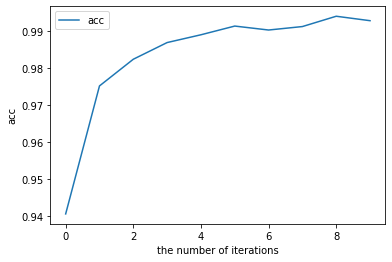

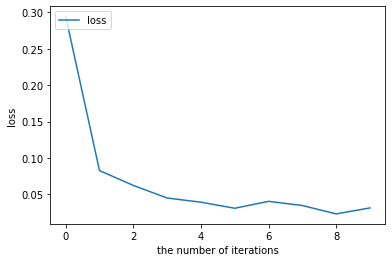


{'test_loss': 1.4780510663986206, 'test_acc': 0.9836999773979187}
802816


RuntimeError: ignored

In [ ]:
import torchbearer
import matplotlib.pyplot as plt
hidden = 401408
#hidden = 784
for big_i in range(10):#
  
  hidden = hidden * (2 ** big_i)
  model = BaselineModel(784, hidden, 10)

  print(hidden)
  loss_function = nn.CrossEntropyLoss()
  optimiser = optim.Adam(model.parameters())

  device = "cuda:0" if torch.cuda.is_available() else "cpu"
  trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
  trial.with_generators(trainloader, test_generator=testloader)


  results_train = trial.run(epochs=10)# 
  print("the number of nodes in the hidden layer:", hidden)
  list_epoch = []
  list_acc = []
  list_loss = []
  for i in range(10):#
    list_epoch.append(i)
    list_acc.append(results_train[i]['acc'])
    list_loss.append(results_train[i]['loss'])


  plt.plot(list_epoch, list_acc, label='acc')
  plt.xlabel("the number of iterations")
  plt.ylabel("acc")
  plt.legend(loc="upper left")
  plt.show()

  plt.plot(list_epoch, list_loss, label='loss')
  plt.xlabel("the number of iterations")
  plt.ylabel("loss")
  plt.legend(loc="upper left")
  plt.show()

  # list_epoch_test = []
  # list_acc_test = []
  # list_loss_test = []
  # for zzz in range (30):
  #   results_test = trial.evaluate(data_key=torchbearer.TEST_DATA)
  #   list_epoch_test.append(zzz)
  #   list_acc_test.append(results_test['test_acc'])
  #   list_loss_test.append(results_test['test_loss'])
  # plt.plot(list_epoch_test, list_acc_test, label='acc')
  # plt.xlabel("the number of iterations")
  # plt.ylabel("acc")
  # plt.legend(loc="upper left")
  # plt.show()

  # plt.plot(list_epoch_test, list_loss_test, label='loss')
  # plt.xlabel("the number of iterations")
  # plt.ylabel("loss")
  # plt.legend(loc="upper left")
  # plt.show()

  results_test = trial.evaluate(data_key=torchbearer.TEST_DATA)
  print(results_test)

  #running为每个batch中的结果。acc为每次epoch中的平均值

In [ ]:
import matplotlib.pyplot as plt

list_epoch = []
list_acc = []
list_loss = []
for i in range(10):
  list_epoch.append(i)
  list_acc.append(results_train[i]['acc'])
  list_loss.append(results_train[i]['loss'])

# 绘制数据
plt.plot(list_epoch, list_acc, label='acc')
plt.xlabel("the number of iterations")
plt.ylabel("acc")
plt.legend(loc="upper left")
plt.show()

plt.plot(list_epoch, list_loss, label='loss')
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()


In [ ]:
# # build the model
# device = "cuda:0" if torch.cuda.is_available() else "cpu"
# model = BaselineModel(784, 784, 10).to(device)

# # define the loss function and the optimiser
# loss_function = nn.CrossEntropyLoss()
# optimiser = optim.Adam(model.parameters()) #model.parameters()获取module中的参数

# # the epoch loop
# for epoch in range(10):
#     running_loss = 0.0
#     for data in trainloader:
#         # get the inputs. data是一个元组，包含图片和label
#         inputs, labels = data
#         inputs, labels = inputs.to(device), labels.to(device)

#         # zero the parameter gradients
#         optimiser.zero_grad()

#         # forward + loss + backward + optimise (update weights)
#         outputs = model(inputs) #调用forward函数：model(x)调用基类的__call__方法，__call__再调用forward
#         loss = loss_function(outputs, labels)
#         loss.backward()
#         optimiser.step()

#         # keep track of the loss this epoch
#         running_loss += loss.item()
#     print("Epoch %d, loss %4.2f" % (epoch, running_loss))
# print('**** Finished Training ****')

In [ ]:
hidden = 784
hidden = hidden * (2 ** big_i)
print("the number of nodes in the hidden layer:", hidden)
model = BaselineModel(784, hidden, 10)


loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(model.parameters())

device = "cuda:0" if torch.cuda.is_available() else "cpu"
trial = torchbearer.Trial(model, optimiser, loss_function, metrics=['loss', 'accuracy']).to(device)
trial.with_generators(trainloader, test_generator=testloader)


results_train = trial.run(epochs=2)#
list_epoch = []
list_acc = []
list_loss = []
for i in range(2):#
  list_epoch.append(i)
  list_acc.append(results_train[i]['acc'])
  list_loss.append(results_train[i]['loss'])


plt.plot(list_epoch, list_acc, label='acc')
plt.xlabel("the number of iterations")
plt.ylabel("acc")
plt.legend(loc="upper left")
plt.show()

plt.plot(list_epoch, list_loss, label='loss')
plt.xlabel("the number of iterations")
plt.ylabel("loss")
plt.legend(loc="upper left")
plt.show()


# test the performance，使用test_data来检测模型
results_test = trial.evaluate(data_key=torchbearer.TEST_DATA)
print(results_test)
#running为每个batch中的结果。acc为每次epoch中的平均值